# Linear Regression

Linear regression is a linear approach to modeling the relationship between a dependent variable and one or more independent variables. In this notebook, we will implement linear regression using the gradient descent algorithm only with numpy and matplotlib.

The model predicts the house price based on the size of the house, number of bedrooms, and age of the house. The data is randomly generated for this example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate data for home price prediction
def generate_data(num_samples):
    np.random.seed(42)
    size = np.random.randint(low=1000, high=4000, size=num_samples)
    bedrooms = np.random.randint(low=1, high=7, size=num_samples)
    age = np.random.randint(low=1, high=60, size=num_samples)
    price = 50*size + 50000*bedrooms - 25*age + np.random.randint(low=20000, high=100000, size=num_samples)
    return size, bedrooms, age, price

In [3]:
# Plot data
def plot_data(size, bedrooms, age, price):
    plt.figure(figsize=(16, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(size, price)
    plt.xlabel('Size in sqft')
    plt.ylabel('Price in $')
    
    plt.subplot(1, 3, 2)
    plt.scatter(bedrooms, price)
    plt.xlabel('Number of bedrooms')
    plt.ylabel('Price in $')
    
    plt.subplot(1, 3, 3)
    plt.scatter(age, price)
    plt.xlabel('Age of house')
    plt.ylabel('Price in $')
    
    plt.tight_layout()
    plt.show()


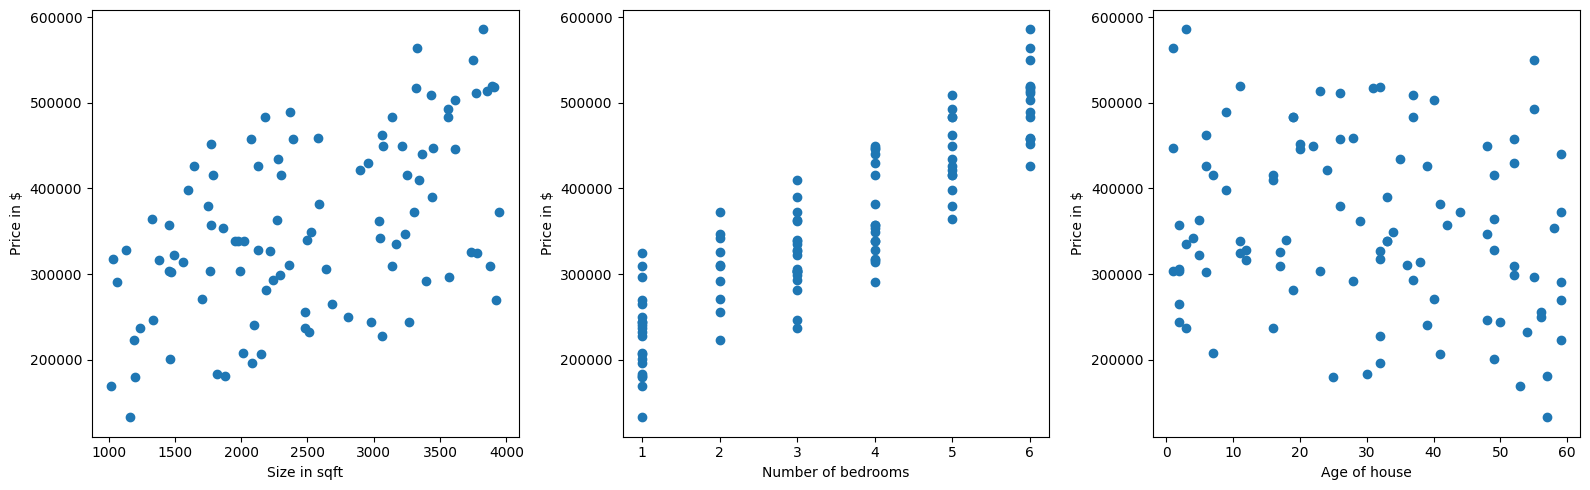

The shape of x1_train is: (100,)
The shape of x2_train is: (100,)
The shape of x3_train is: (100,)
The shape of y_train is: (100,)
Number of training examples (m): 100


In [4]:
# x1_train: size of the house, x2_train: number of bedrooms, x3_train: age of the house, y_train: price of the house 
x1_train, x2_train, x3_train, y_train = generate_data(100)
plot_data(x1_train, x2_train, x3_train, y_train)
# print the shapes of the training data
print('The shape of x1_train is:', x1_train.shape)
print('The shape of x2_train is:', x2_train.shape)
print('The shape of x3_train is:', x3_train.shape)
print('The shape of y_train is:', y_train.shape)
print('Number of training examples (m):', len(x1_train))


In [5]:
# Normalizing the data to speed up learning and to make training easier
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)
x3_mean = np.mean(x3_train)
x3_std = np.std(x3_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

x1_train = normalize(x1_train)
x2_train = normalize(x2_train)
x3_train = normalize(x3_train)
y_train = normalize(y_train)


In [6]:
# Compute Cost Function J(w1, w2, w3, b) = 1/2m * sum((predicted_values - y)^2)
def compute_cost(x1, x2, x3, y, w1, w2, w3, b):
    m = len(x1)
    predicted_values = w1*x1 + w2*x2 + w3*x3 + b
    squared_error = (predicted_values - y)**2
    total_cost = 1/(2*m) * np.sum(squared_error)
    return total_cost

# Find the cost for the model
initial_w1 = 0
initial_w2 = 0
initial_w3 = 0
initial_b = 0

cost = compute_cost(x1_train, x2_train, x3_train, y_train, initial_w1, initial_w2, initial_w3, initial_b)
print('The cost for the initial model is:', cost)


The cost for the initial model is: 0.5000000000000001


In [7]:
# Gradient Descent Algorithm to minimize the cost function
def gradient_descent(x1, x2, x3, y, w1, w2, w3, b):
    m = len(x1)
    predicted_value = w1*x1 + w2*x2 + w3*x3 + b
    error = predicted_value - y
    dj_dw1 = (1/m) * np.dot(error, x1)
    dj_dw2 = (1/m) * np.dot(error, x2)
    dj_dw3 = (1/m) * np.dot(error, x3)
    dj_db = (1/m) * np.sum(error)
    return dj_dw1, dj_dw2, dj_dw3, dj_db

# Compute Gradient
dj_dw1, dj_dw2, dj_dw3, dj_db = gradient_descent(x1_train, x2_train, x3_train, y_train, initial_w1, initial_w2, initial_w3, initial_b)
print('The gradient for w1 is:', dj_dw1)
print('The gradient for w2 is:', dj_dw2)
print('The gradient for w3 is:', dj_dw3)
print('The gradient for b is:', dj_db)


The gradient for w1 is: -0.5182284524143586
The gradient for w2 is: -0.8877959985427013
The gradient for w3 is: 0.18771647545105047
The gradient for b is: -5.995204332975846e-17


In [8]:
# Batch Gradient Descent Algorithm to minimize the cost function using the gradient descent algorithm for a number of iterations
def batch_gradient_descent(x1, x2, x3, y, w1, w2, w3, b, alpha, num_iterations):
    J_history = []
    for i in range(num_iterations):
        dj_dw1, dj_dw2, dj_dw3, dj_db = gradient_descent(x1, x2, x3, y, w1, w2, w3, b)
        w1 -= alpha * dj_dw1
        w2 -= alpha * dj_dw2
        w3 -= alpha * dj_dw3
        b -= alpha * dj_db
        cost = compute_cost(x1, x2, x3, y, w1, w2, w3, b)
        J_history.append(cost)
    return w1, w2, w3, b, J_history

# Initialize fitting parameters
initial_w1 = 0
initial_w2 = 0
initial_w3 = 0
initial_b = 0

iterations = 1500
alpha = 0.01

w1, w2, w3, b, J_history = batch_gradient_descent(x1_train, x2_train, x3_train, y_train, initial_w1, initial_w2, initial_w3, initial_b, alpha, iterations)
print('The value of w1 is:', w1)
print('The value of w2 is:', w2)
print('The value of w3 is:', w3)
print('The value of b is:', b)


The value of w1 is: 0.40391463523811205
The value of w2 is: 0.8268829313555823
The value of w3 is: -0.04529435694487147
The value of b is: 1.1100009800202313e-16


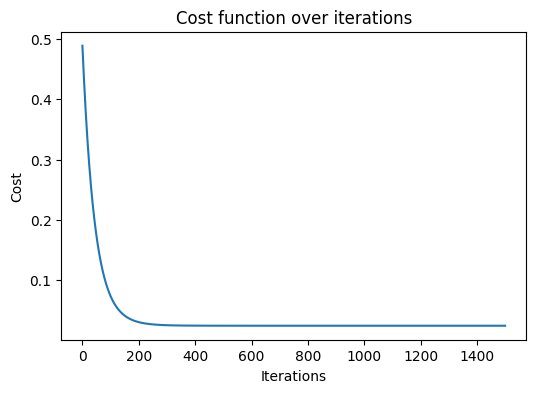

In [9]:
# Plot the cost function over iterations
plt.figure(figsize=(6, 4))
plt.plot(range(iterations), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

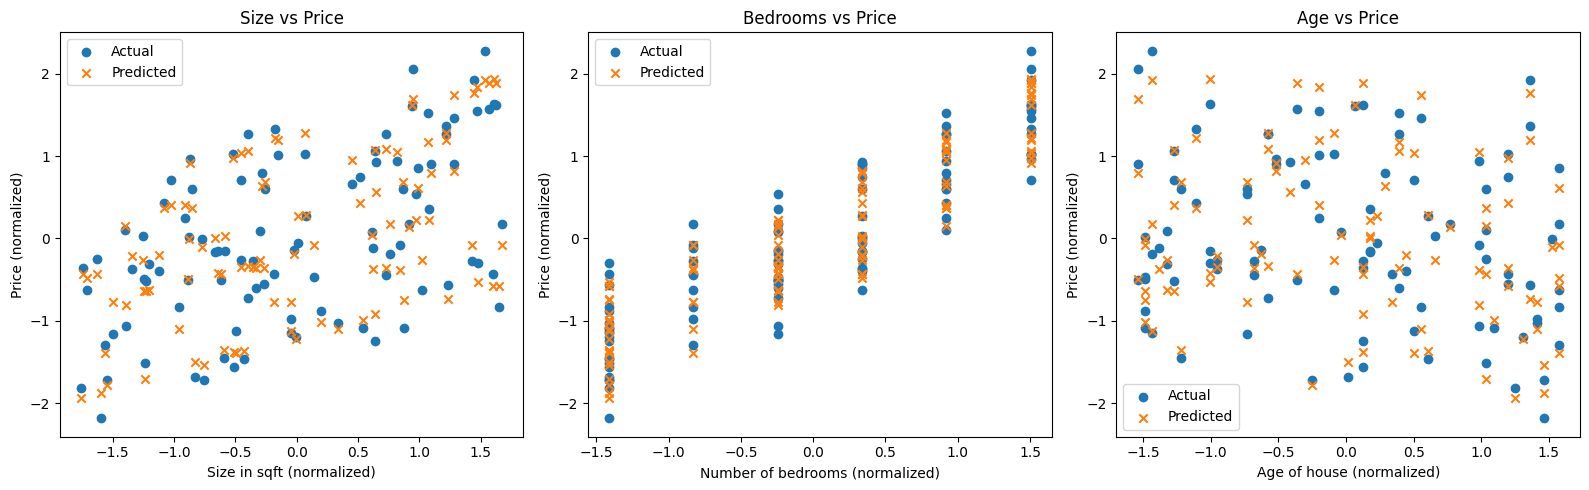

In [10]:
# Graph the model predictions
def plot_model(x1, x2, x3, y, w1, w2, w3, b):
    fig = plt.figure(figsize=(16, 5))
    
    # Predicted values
    predicted_values = w1 * x1 + w2 * x2 + w3 * x3 + b

    # Plot size vs. price
    plt.subplot(1, 3, 1)
    plt.scatter(x1, y, label='Actual')
    plt.scatter(x1, predicted_values, label='Predicted', marker='x')
    plt.xlabel('Size in sqft (normalized)')
    plt.ylabel('Price (normalized)')
    plt.title('Size vs Price')
    plt.legend()

    # Plot bedrooms vs. price
    plt.subplot(1, 3, 2)
    plt.scatter(x2, y, label='Actual')
    plt.scatter(x2, predicted_values, label='Predicted', marker='x')
    plt.xlabel('Number of bedrooms (normalized)')
    plt.ylabel('Price (normalized)')
    plt.title('Bedrooms vs Price')
    plt.legend()

    # Plot age vs. price
    plt.subplot(1, 3, 3)
    plt.scatter(x3, y, label='Actual')
    plt.scatter(x3, predicted_values, label='Predicted', marker='x')
    plt.xlabel('Age of house (normalized)')
    plt.ylabel('Price (normalized)')
    plt.title('Age vs Price')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_model(x1_train, x2_train, x3_train, y_train, w1, w2, w3, b)


In [11]:
# Predict price for a 2000 sqft home with 3 bedrooms and 10 years old
new_size = 2000
new_bedrooms = 3
new_age = 10

# Normalize the new data using training data's mean and std
new_size_normalized = (new_size - x1_mean) / x1_std
new_bedrooms_normalized = (new_bedrooms - x2_mean) / x2_std
new_age_normalized = (new_age - x3_mean) / x3_std

# Predict using the learned parameters
predicted_price_normalized = w1 * new_size_normalized + w2 * new_bedrooms_normalized + w3 * new_age_normalized + b

# Convert the normalized predicted price back to the original scale
predicted_price = predicted_price_normalized * y_std + y_mean

print(f'The predicted price of a 2000 sqft home with 3 bedrooms and 10 years old is: ${predicted_price:.2f}')

The predicted price of a 2000 sqft home with 3 bedrooms and 10 years old is: $313682.81


In [12]:
# Predict price for a 3500 sqft home with 5 bedrooms and 5 years old
new_size = 3500
new_bedrooms = 5
new_age = 5

# Normalize the new data using training data's mean and std
new_size_normalized = (new_size - x1_mean) / x1_std
new_bedrooms_normalized = (new_bedrooms - x2_mean) / x2_std
new_age_normalized = (new_age - x3_mean) / x3_std

# Predict using the learned parameters
predicted_price_normalized = w1 * new_size_normalized + w2 * new_bedrooms_normalized + w3 * new_age_normalized + b

# Convert the normalized predicted price back to the original scale
predicted_price = predicted_price_normalized * y_std + y_mean
print(f'The predicted price of a 4500 sqft home with 5 bedrooms and 5 years old is: ${predicted_price:.2f}')

The predicted price of a 4500 sqft home with 5 bedrooms and 5 years old is: $484826.84
